# Check how diabatic the buoyancy fluxes become due to averaging. 

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig

In [2]:
data_dir = '/swot/SUM04/dbalwada/channel_model/05km/run_multi_tracer_restored_all_tracers/'
# 
iters = range(13426560, 10473120+518400*4, 1440)
model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave']
ds_model = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [3]:
# Does time averaging make the buoyancy flux diabatic? 
# (assume that instantaneously it is adiabatic, but it can be checked)

In [6]:
grid = Grid(ds_model, periodic='X')

In [9]:
UT = grid.interp(ds_model.UTtave, 'X')
VT = grid.interp(ds_model.VTtave, 'Y', boundary='extend')
WT = grid.interp(ds_model.WTtave, 'Z', boundary='extend')

In [10]:
T_X = grid.interp(grid.diff(ds_model.Ttave, 'X'), 'X')
T_Y = grid.interp(grid.diff(ds_model.Ttave, 'Y', boundary='extend'), 'Y', boundary='extend')
T_Z = grid.interp(grid.diff(ds_model.Ttave, 'Z', boundary='extend'), 'Z', boundary='extend')

In [21]:
dia_flux = (UT*T_X + VT*T_Y + WT*T_Z)/(T_X**2 + T_Y**2 + T_Z**2)

In [33]:
Kgm = (-(UT*T_X + VT*T_Y)/(T_X**2 + T_Y**2)).mean('time').load()

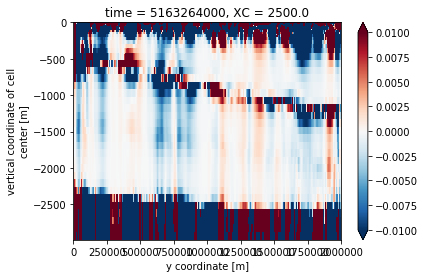

In [22]:
dia_flux.sel(XC=0, method='nearest').isel(time=-1).plot(vmin=-0.01)

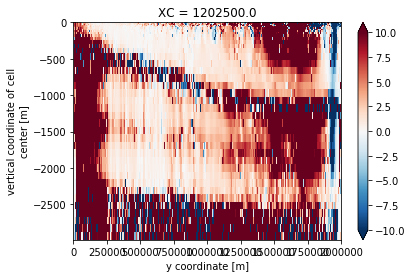

In [36]:
Kgm.sel(XC=1200e3, method='nearest').plot(vmin=-10)

In [23]:
dia_flux_mean = dia_flux.mean('time').load()

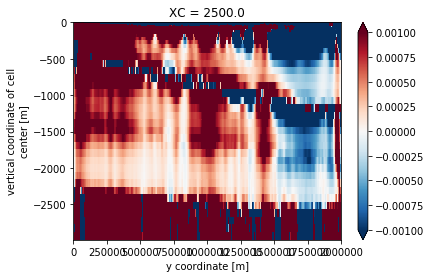

In [25]:
(-dia_flux_mean).sel(XC=0, method='nearest').plot(vmin=-1e-3)

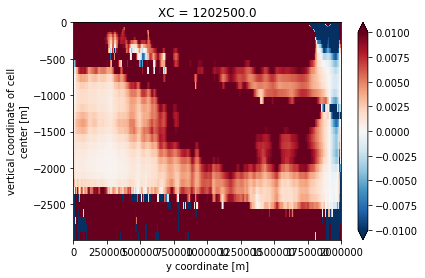

In [27]:
(-dia_flux_mean).sel(XC=1200e3, method='nearest').plot(vmin=-1e-2)

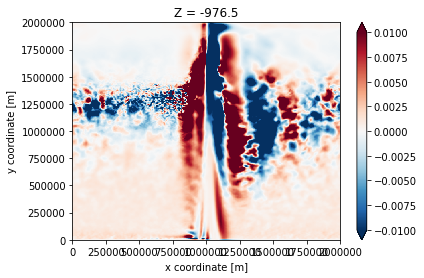

In [28]:
(-dia_flux_mean).sel(Z=-1000, method='nearest').plot(vmin=-1e-2)

In [ ]:
# probably directly checking the fluxe